In [90]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

def preprocessing(csv_name, class_name, idx, sep): # made by Jules Saïdane and Germain Morilhat
    #csv_name is data name
    #class_name represents the data's class_name for classification
    #sep is the data separator 
    #idx is a arbitrary row number
    
    # First, we need to load the data
    data = pd.read_csv(csv_name,sep=sep)
    N = len(data[class_name])
    
    # Separating labels from data
    # If labels are str type, we change them into 1 or 0
    if isinstance(data[class_name][idx], str):
        labels = np.multiply([data[class_name]==data[class_name][0]],1)[0] #data[class_name][0] represents a 1
    else:
        labels = data[class_name]
    data.drop(class_name, 1, inplace=True) # We drop labels from data in order to get vectors values
    
    # Getting vectors values
    for c in data:
        if isinstance(data[c][idx], str):
            new_col = np.multiply([data[c] == data[c][idx]],1)
            data.drop(c, 1, inplace=True)
            data[c] = new_col[0]                
        data[c] = np.nan_to_num(data[c], copy=True, nan=data[c].median())
        
    # Using correlation matrix to get rid of some columns
    correlation = data.corr().abs()

    f = plt.figure(figsize=(19, 15))
    plt.matshow(correlation, fignum=f.number)
    plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16);
    
    correlated_values=np.where(correlation>0.75)
    correlated_values=np.array([(correlation.columns[x],correlation.columns[y]) for x,y in zip(*correlated_values) if x!=y and x<y])
    
    for i in range(len(correlated_values)):
        c = correlated_values[i][0]
        data.drop(c, 1, inplace=True)
    
    # Finally
    X = data
    X = StandardScaler().fit_transform(X) #normalize our data
    # Creation of a dataset to train and another to test
    x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.20, random_state=42)
    return  x_train, x_test, y_train, y_test, X, labels

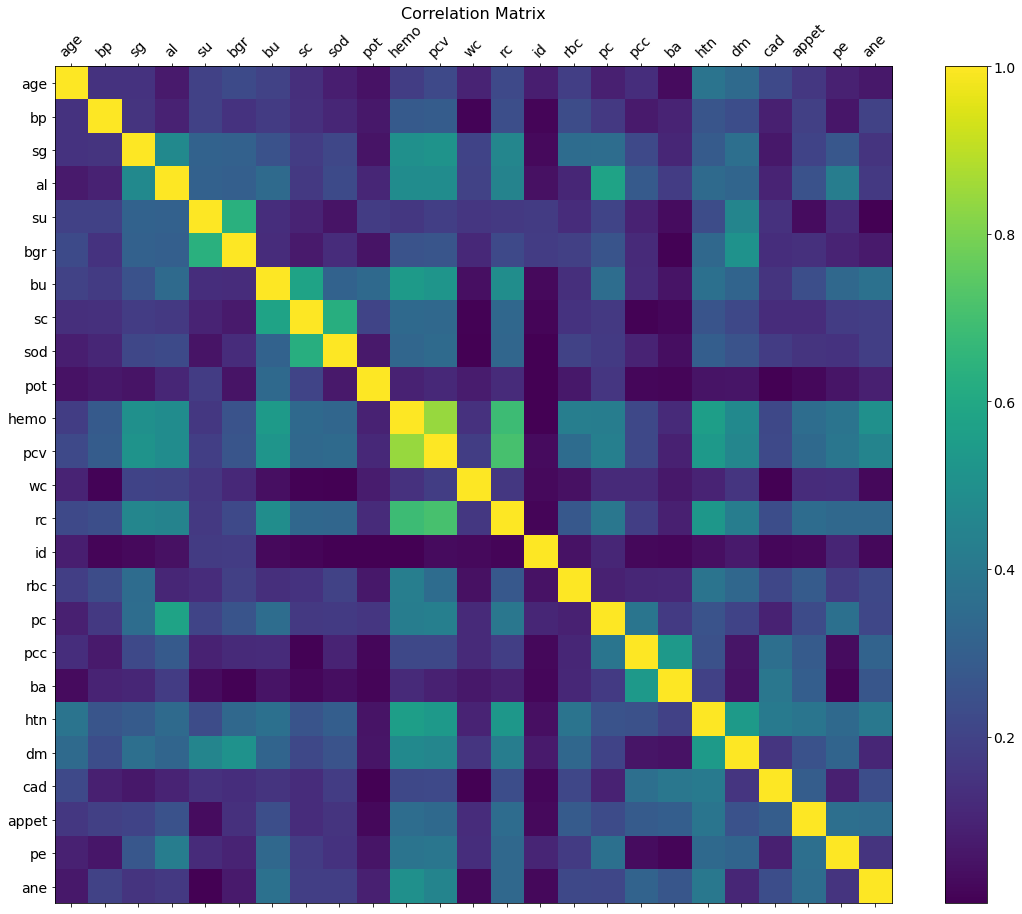

In [91]:
x_train1, x_test1, y_train1, y_test1, X1, Y1 = preprocessing("kidney_disease.csv", "classification", 7, ',')

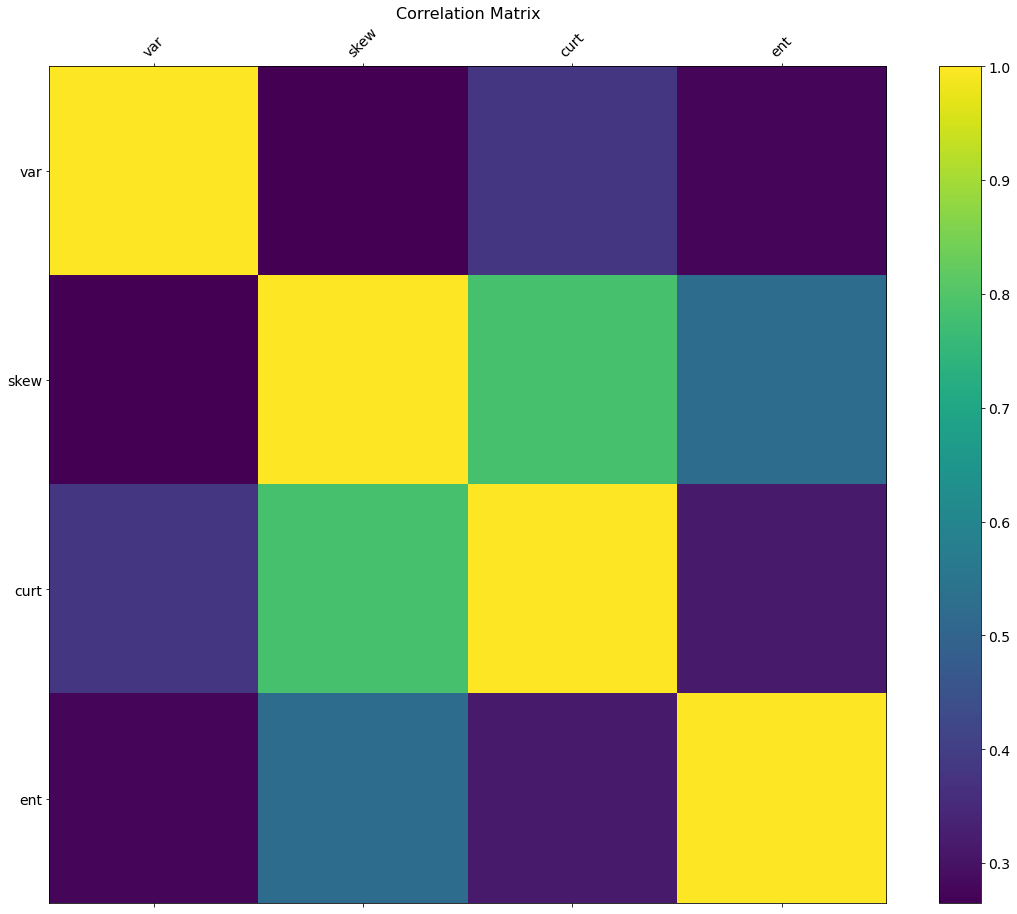

In [92]:
x_train2, x_test2, y_train2, y_test2, X2, Y2 = preprocessing("data_banknote_authentication.csv", "class", 7, ";")

In [113]:
# Models import list
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# made by Jules Saïdane and Alaeddine Ben Fradj
def  cross_validation_comparaison(X, Y, N): #N is the number of validation that we will compute

      # Models dictionnary

    models = {svm.SVC(kernel='linear'):'SVM with linear kernel',
              svm.SVC(kernel='poly', degree=2, gamma='auto'):'SVM with polynomial (degree 2) kernel',
              svm.SVC(kernel='rbf', gamma='auto'):'SVM with RBF kernel',
              svm.SVC(kernel='sigmoid', gamma=1./150):'SVM with sigmoid kernel',
              SGDClassifier():'Stochastic Gradient Descent',
              DecisionTreeClassifier():'Decision Trees',
              GaussianNB():'Bayesian classifier',
              RandomForestClassifier(n_estimators = 100, random_state = 42):'Random Forest',
              MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,2), random_state=42,max_iter=1000):'Neural Network',
              LogisticRegression(random_state=0):'Logistic Regression'}
    
    # Models score list with N_cross-validation.
    scores=[]
    scores = [np.mean(cross_val_score(clf, X, Y, cv=N)) for clf in list(models.keys())]
    print(list(models.values())[scores.index(max(scores))], max(scores))

    return "Method with the best accuracy is:",list(models.values())[scores.index(max(scores))],"Here are the different scores:",[(list(models.values())[i],scores[i]) for i in range(len(scores))]

In [114]:
Results_1=cross_validation_comparaison(X1,Y1,10)

SVM with RBF kernel 0.9625


In [115]:
#Made by Germain Morilhat
def plot_result(result):
  plt.figure(figsize=(30,10))
  plt.bar([result[i][0] for i in range(len(result))],[result[i][1] for i in range(len(result))])
  plt.ylabel('Cross validation score')
  plt.title('Cross Validation score of each model')
  return plt.show()

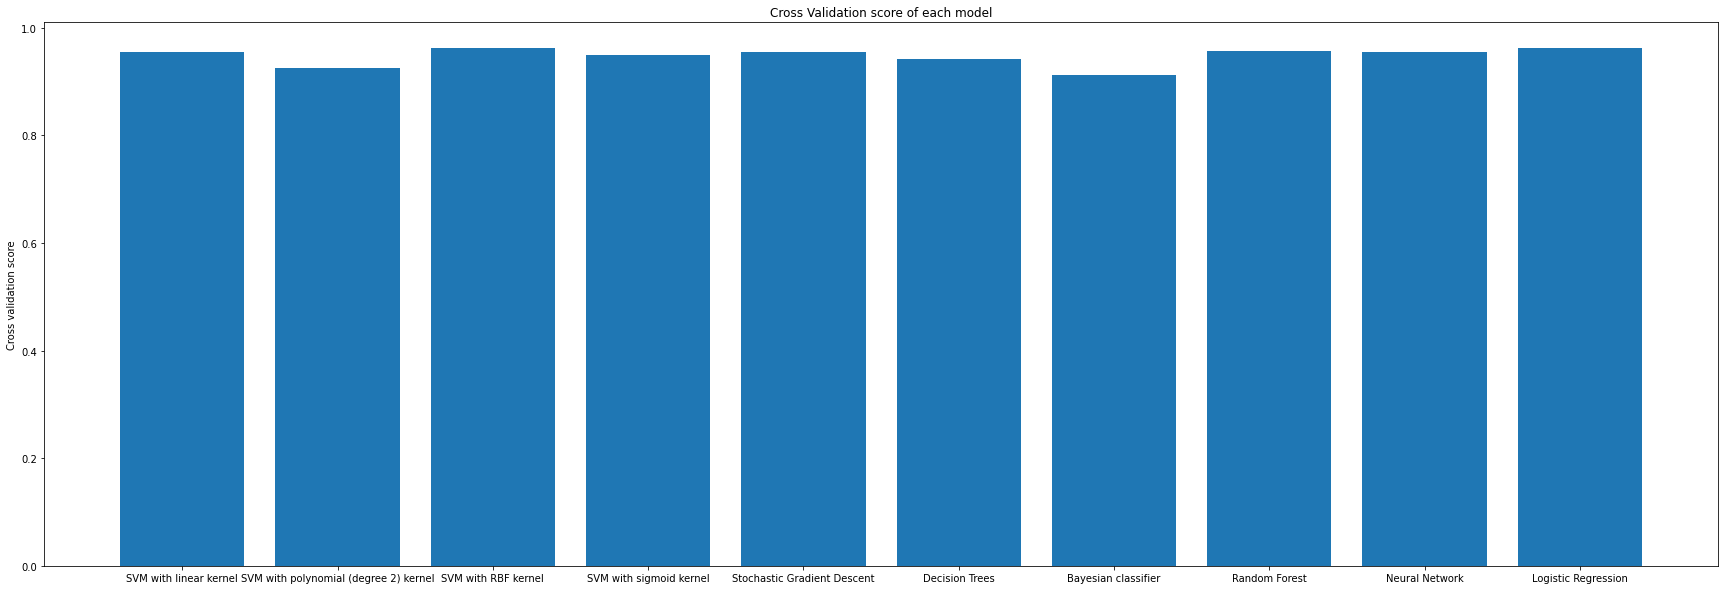

None


In [116]:
print(plot_result(Results_1[3]))

In [117]:
Results_2=cross_validation_comparaison(X2,Y2,10)

SVM with RBF kernel 0.9832487041150959


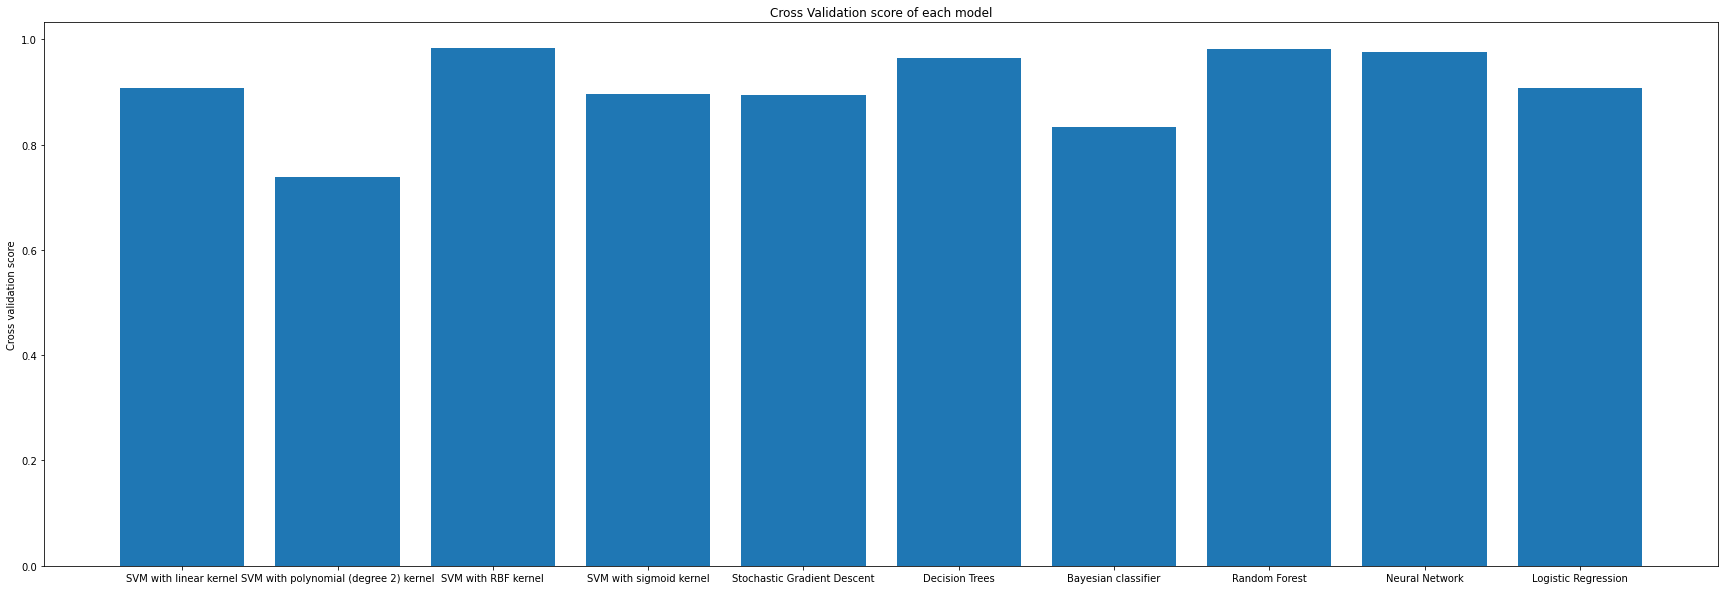

None
[('SVM with linear kernel', 0.9082196128213266), ('SVM with polynomial (degree 2) kernel', 0.7377975245953665), ('SVM with RBF kernel', 0.9832487041150959), ('SVM with sigmoid kernel', 0.8965672273352375), ('Stochastic Gradient Descent', 0.8944038929440389), ('Decision Trees', 0.9635777002009943), ('Bayesian classifier', 0.8325187771077964), ('Random Forest', 0.981058923093198), ('Neural Network', 0.9766952290278219), ('Logistic Regression', 0.9067703374590078)]


In [118]:
print(plot_result(Results_2[3]))
print(Results_2[3])